## MeriSkill: Diabetes Dataset

**INTRODUCTION**

**Dataset Description:**
> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The Objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular here are females atleast 21 years ols of Pima Indian heritage.

> The dataset is characterized by 9 Columns

- **Pregnancies:** The number of pregancies of the patient

- **Glucose:** The Glucose levels (fasting blood sugar or glucose tolerance test results) of the patient.

- **BloodPressure** The hypertension or hypotension level of the patient.

- **SkinThickness:** Body composition of the patient (Thick, Very thick, thin, very thin).

- **Insulin:** The insulin level or resistance of the patient.

- **BMI:** The weight of the patient (Obesity, Over weight and Under weight).

- **DiabetesPedigreeFunction:** The genetic component related to the risk of diabetes of the patient.

- **Age:** The age of the patient.

- **Outcome:** The target variable, indicating the presence or absence of Diabetes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
dia = pd.read_csv('diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check the information about the dataset
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Check the label of each column in the dataset
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#Check the description of the dataset
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check the number of unique values for each column
dia.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
#Check for the sum of duplicate rows in the dataset
dia.duplicated().sum()

0

In [8]:
#Shape of the data
dia['Outcome'].unique()

array([1, 0], dtype=int64)

**"1"** refers to **Diabetes**, while **"0"** indicates the **absence of Diabetes**. The "Outcome" column serves as the target variable that classifies whether a patient has diabetes or not based on the given features.


In [9]:
#Check null values
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

After checking the general properties of the dataset, I observed that there are 768 rows and 9 columns. Also, there are no missing values and duplicate rows.

## VISUALIZATION

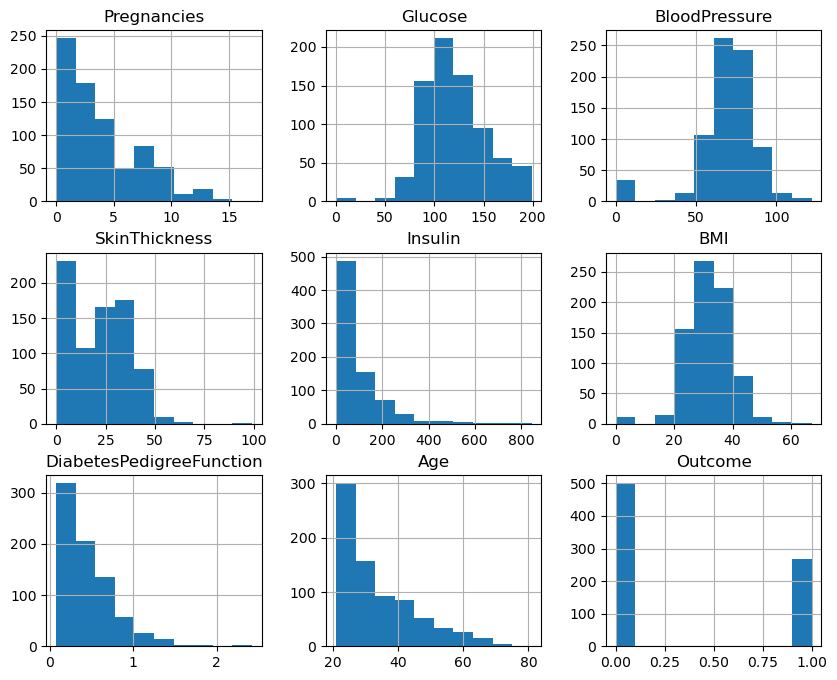

In [10]:
dia.hist(figsize =(10,8))
plt.show()

<Figure size 1000x800 with 0 Axes>

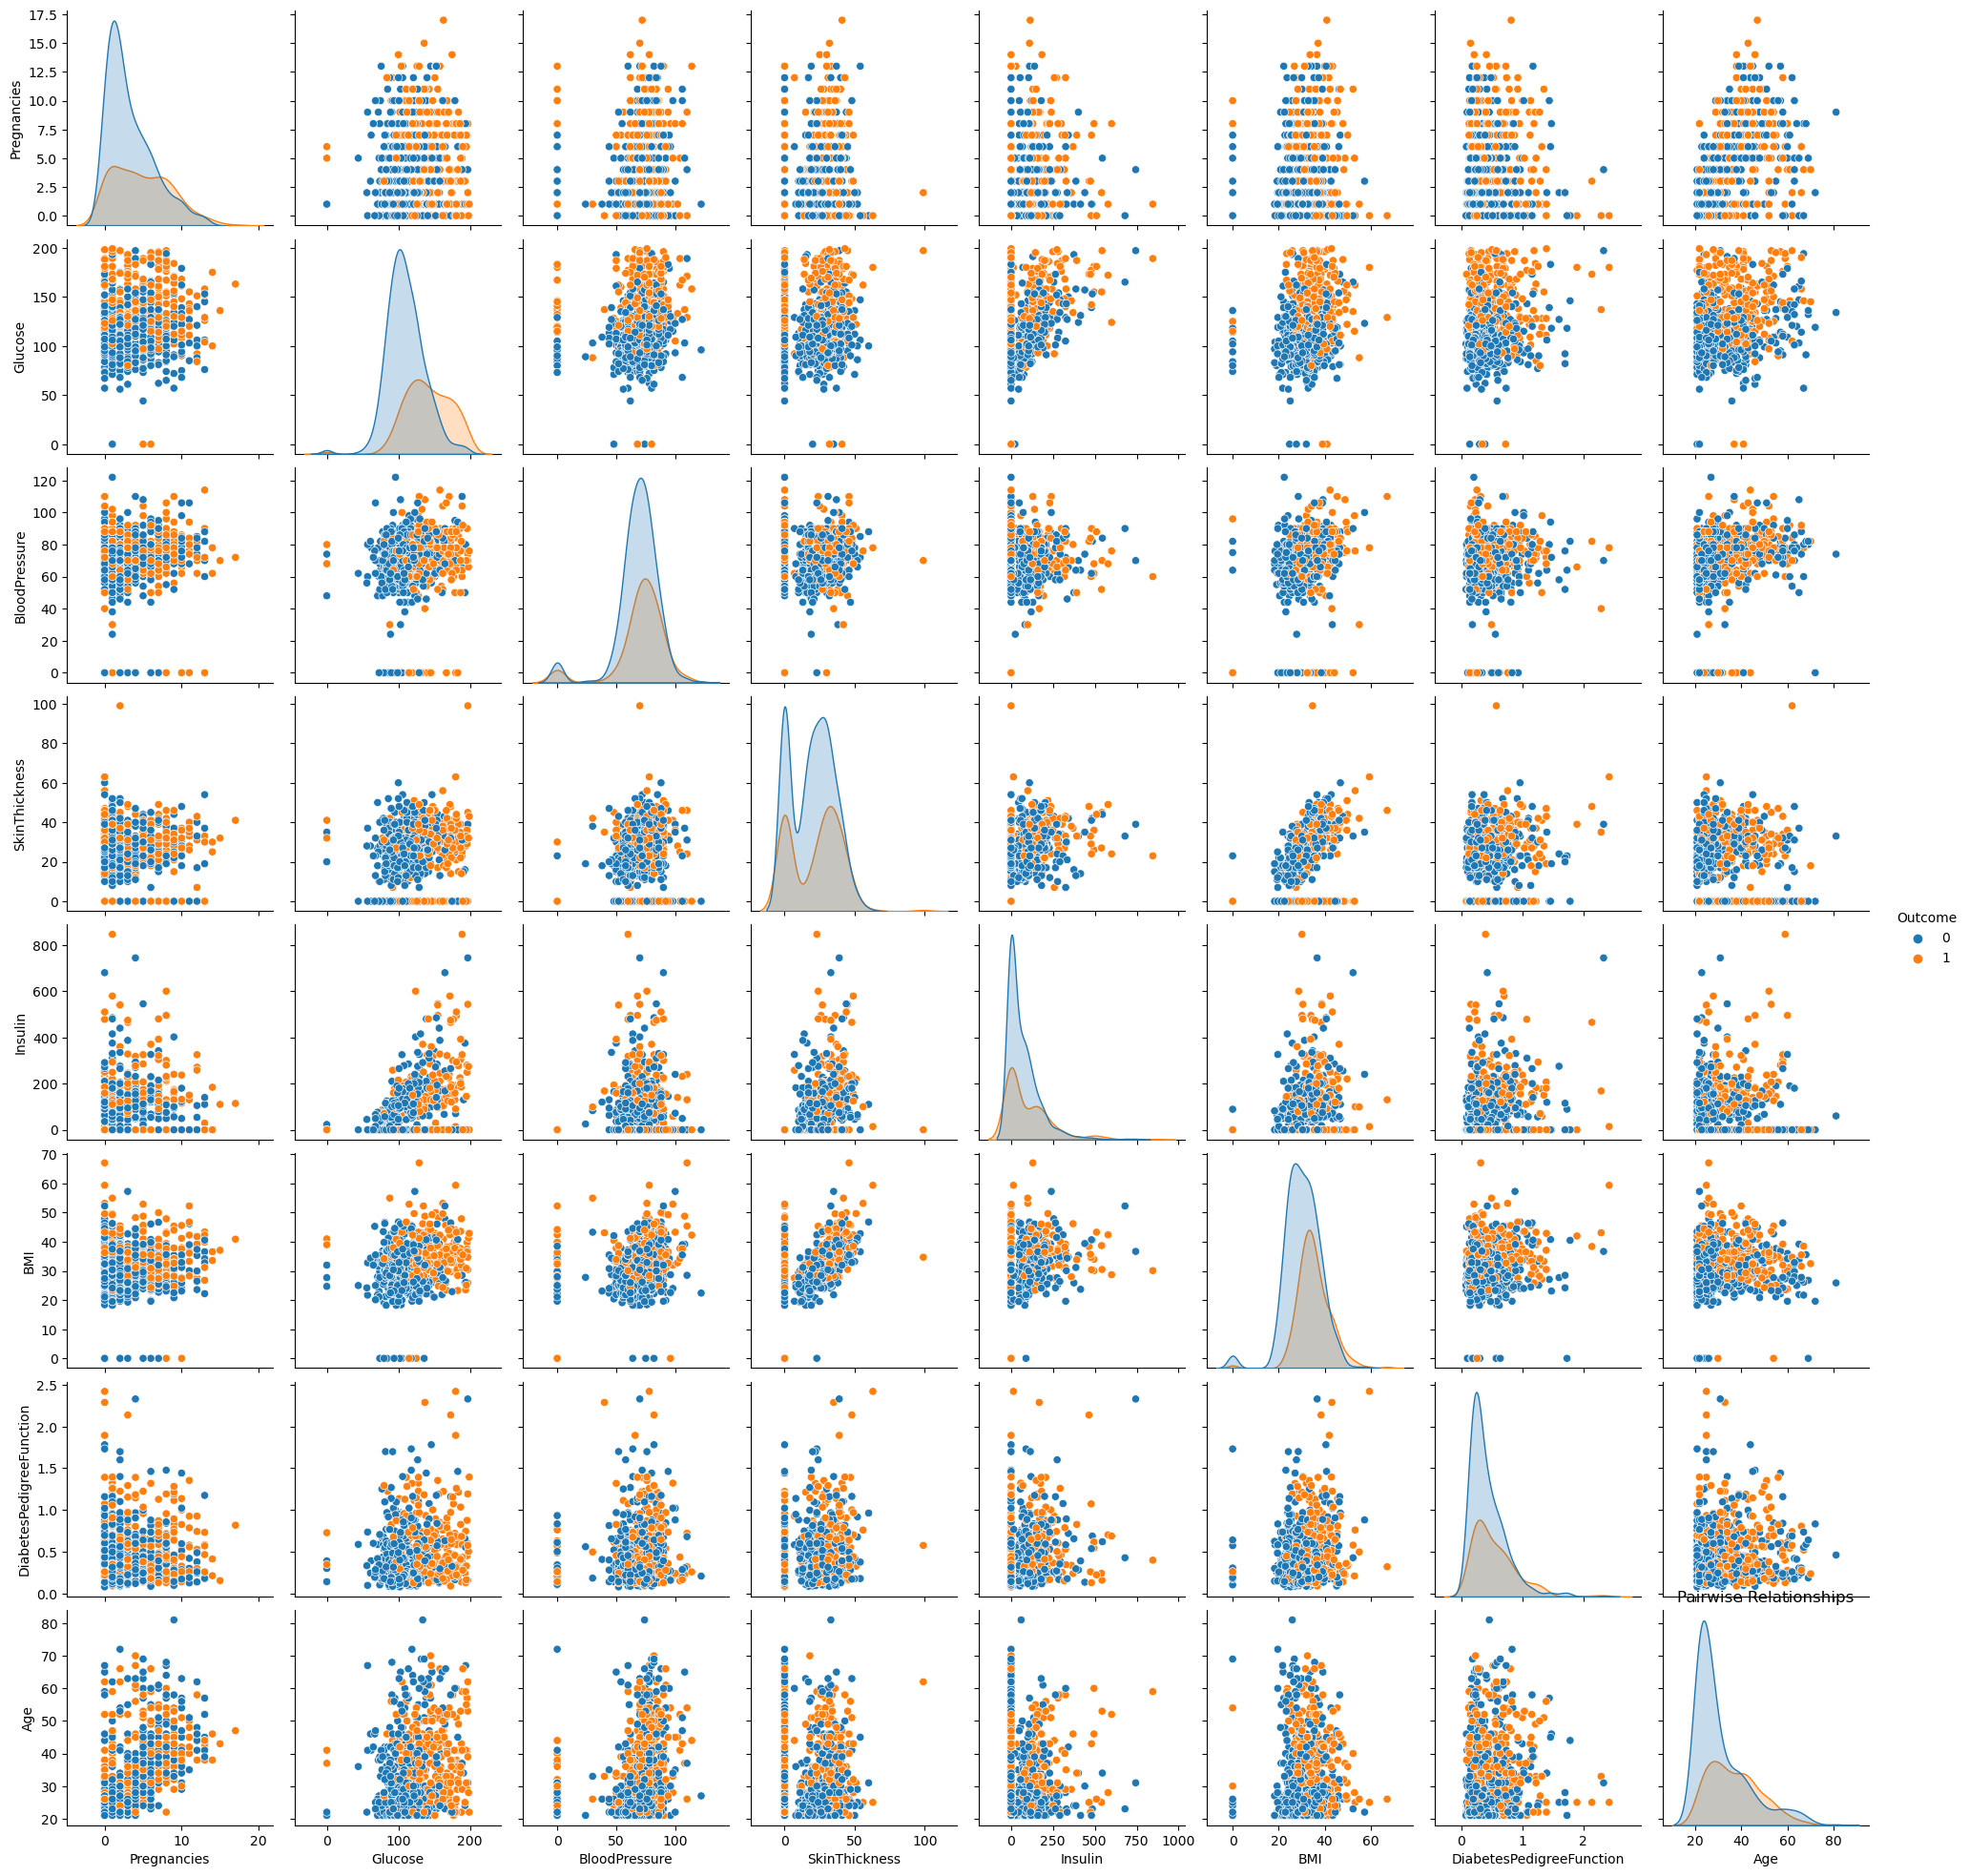

In [11]:
#Visualize pairwise relationships between multiple variables, highlighting different classes.
plt.figure(figsize=(10, 8))
sns.pairplot(data=dia, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.title('Pairwise Relationships')
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


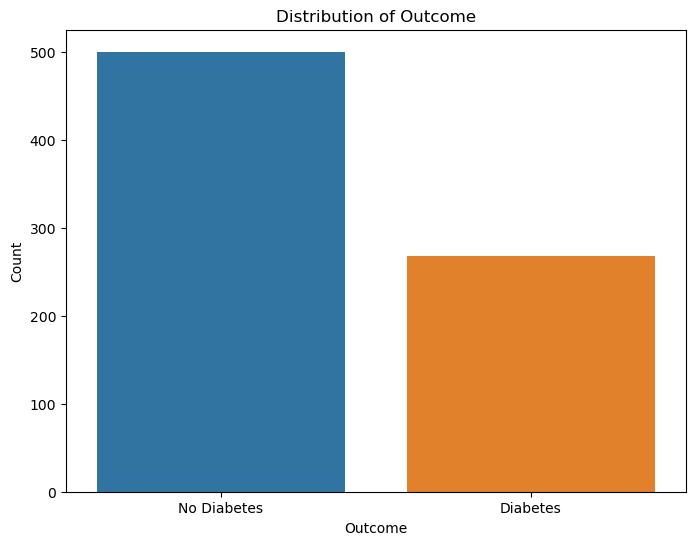

In [12]:
#Check for the Target Variable Distribution
target_counts = dia['Outcome'].value_counts()
print(target_counts)

#Plot the Histogram of Outcome valuecount
plt.figure(figsize=(8, 6))
sns.countplot(data=dia, x='Outcome')
plt.xticks([0,1],['No Diabetes', 'Diabetes'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

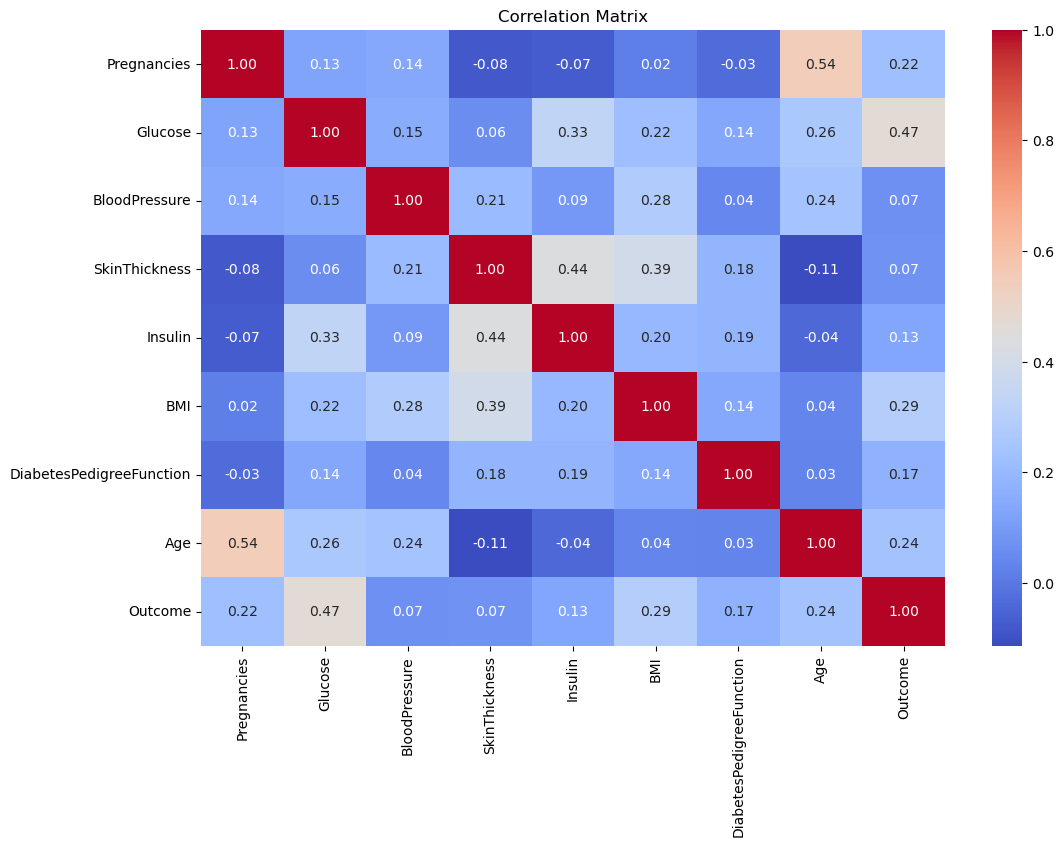

In [13]:
#Check the correlation of the data
corr_matrix = dia.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
#Age Value Count
dia['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [15]:
#GenZ[11-26], Millennials[27-42], GenX[43-58], BabyBoomers[59-68], SilentGeneration[69-above]
dia['age_category'] = ['GenZ' if 11 <= Age < 26 else 'Millennials' if 27 <= Age < 42 else 'GenX' if 43 <= Age < 58 else 'BabyBoomers' if 59 <= Age < 68 else 'Adults' 
                       for Age in dia['Age']]

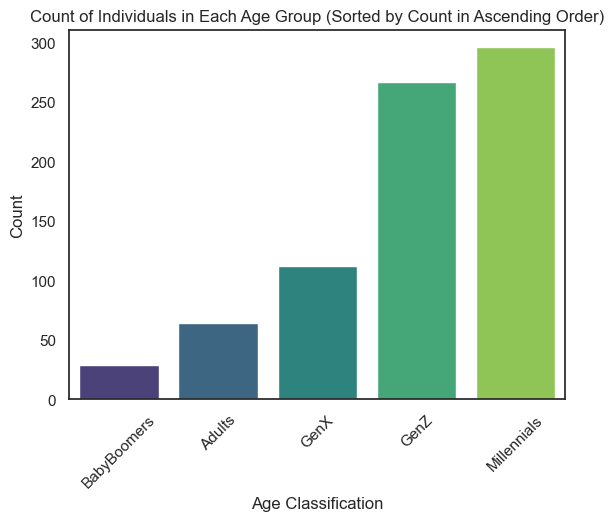

In [16]:
# Count the number of individuals in each age category
age_cat_counts = dia['age_category'].value_counts().reset_index()
age_cat_counts.columns = ['age_category', 'count']

# Sort the age categories by count in ascending order
age_cat_counts = age_cat_counts.sort_values(by='count', ascending=True)

# Set the style of the plot
sns.set(style="white")

# Create a count plot with age categories sorted by count in ascending order
sns.countplot(x='age_category', data=dia, palette='viridis', order=age_cat_counts['age_category'])

# Set labels and title
plt.xlabel('Age Classification')
plt.ylabel('Count')
plt.title('Count of Individuals in Each Age Group (Sorted by Count in Ascending Order)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

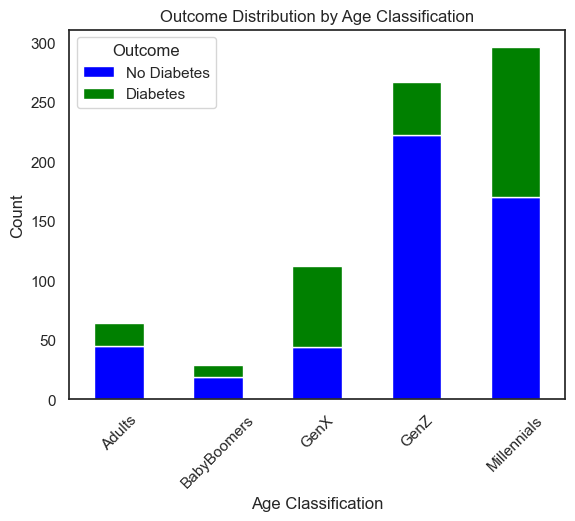

In [17]:
#Create a crosstab to count the outcomes for each age group
outcome_count = pd.crosstab(index=dia['age_category'], columns=dia['Outcome'])

#Create a stacked bar plot
plt.figure(figsize=(10, 6)) 
outcome_count.plot(kind='bar', stacked=True, color=['blue', 'green'])

#Set labels and title
plt.xlabel('Age Classification')
plt.ylabel('Count')
plt.title('Outcome Distribution by Age Classification')

#Customize the legend
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])

#Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

#Show the plot
plt.show()

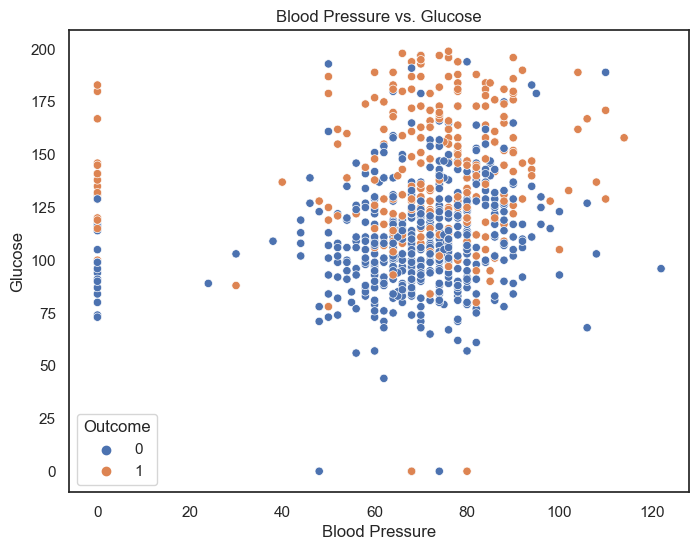

In [18]:
#Scatter plot of Blood Pressure vs. Glucose
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dia, x='BloodPressure', y='Glucose', hue='Outcome')
plt.title('Blood Pressure vs. Glucose')
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.legend(title='Outcome')
plt.show()

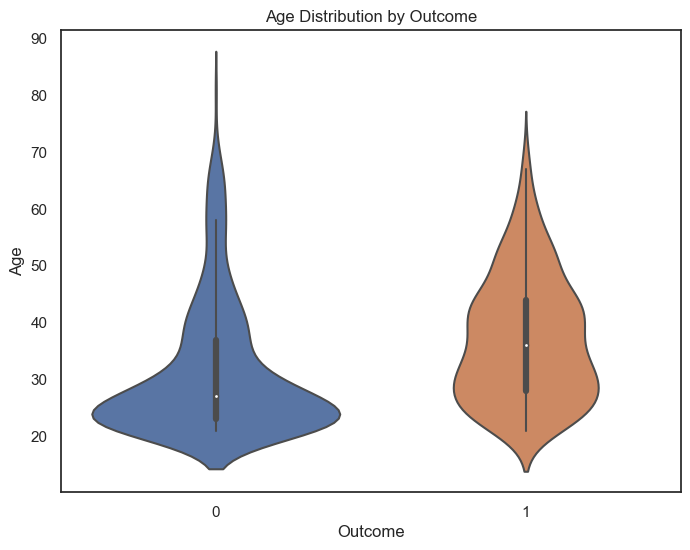

In [19]:
#Visualize the distribution of a continuous variable (Age) across different classes
plt.figure(figsize=(8, 6))
sns.violinplot(data=dia, x='Outcome', y='Age')
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

From the visualization above, the following can be deduced:

1) The histogram chart shows that the distribution of Glucose, BMI and, BloodPressure are normally distributed while Age, Pregnancies, Age, Insulin and, SkinThickness distribution are skewed distribution.

2) The pairwise relationship highlighted potential correlations and patterns between multiple variables, contributing to feature selection and engineering.

3) The count of pateients without Diabetes is 500 females and those with Diabetes is 268 females.

4) The heatmap shows that there is a strong positive correlation between Age and Pregnancies, a negative correlation between Age and SkinThickness, a moderate postive correlation between Glucose and Insulin and, a very weak positive correlation between DiabetesPedigreeFunction and Age. Furthermore, on the heatmap, the outcome variable which is the target variable representing whether or not a patient has diabetes, it is seen that Glucose has the highest positive correlation followed by BMI, Age and Pregnancies with a moderate positive correlation, then the DiabetesPedigreeFunction and Insulin with a weak positive correlation and lastly BloodPressure and SkinThickness with very weak positive correlation. This indicates that Glucose level is highly associated with likelihood of Diabetes.

5) The Age distribution and Classification according to Age Groups with Outcomes, shows that the Millennials (27-42) has a low prevalence of no Diabetes as compared to other age groups (GenX, BabyBoomers and SilentGeneration) which tends to be on a minimal and has high prevalence on GenZ (11-26). Also majority of the Age Group falls within the age of younger age.

6) The scatterplot between BloodPressure and Glucose reveals that there is distinct significant relationship between this two variable.

7) The Violin plot demonstrated variations in the age distribution across different Outcome, providing insights into age related differences.

## DATA SEGMENTATION AND MODELLING

In [20]:
#Separate the features (X) and target variable (y)
target = 'Outcome'
X = dia.drop(columns = [target,'age_category'], axis=1)
y = dia[target]

In [21]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Standardize the feature
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [23]:
#Create an instance of Logistic Regression
reg = LogisticRegression()

#Fit the model on the training data
reg.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#Make predictions on the test data
test_pred = reg.predict(X_test)

#Print the classification report for the test set
test_accuracy = accuracy_score(y_test, test_pred)
print('Test Accuracy:', test_accuracy)
print('Classification Report for Test Set:')
print(classification_report(y_test, test_pred))

#Make predictions on the training data
train_pred = reg.predict(X_train)

#Print the classification report for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print('Training Accuracy:', train_accuracy)
print('Classification Report for Training Set:')
print(classification_report(y_train, train_pred))

Test Accuracy: 0.7532467532467533
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Training Accuracy: 0.7719869706840391
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [25]:
#Create the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the classifier
clf.fit(X_train, y_train)

#Predict on the training set
train_pred1 = clf.predict(X_train)
train_accuracy1 = accuracy_score(y_train, train_pred1)
print('Training Accuracy:', train_accuracy)

#Print the classification report for the training set
print('Classification Report for Training Set:')
print(classification_report(y_train, train_pred1))


#Predict on the test set
test_pred1 = clf.predict(X_test)
test_accuracy1 = accuracy_score(y_test, test_pred1)
print('Test Accuracy:', test_accuracy1)

#Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, test_pred1))


Training Accuracy: 0.7719869706840391
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test Accuracy: 0.7467532467532467
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [26]:
#Create the gradient boosting classifier
gbc = GradientBoostingClassifier()

#Train the classifier
gbc.fit(X_train, y_train)

#Predict on the training set
train_pred2 = gbc.predict(X_train)
train_accuracy2 = accuracy_score(y_train, train_pred2)
print('Training Accuracy:', train_accuracy2)

#Print the classification report for the training set
print('Classification Report for Training Set:')
print(classification_report(y_train, train_pred2))

#Predict on the test set
test_pred2 = gbc.predict(X_test)
test_accuracy2 = accuracy_score(y_test, test_pred2)
print('Test Accuracy:', test_accuracy2)

#Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, test_pred2))

Training Accuracy: 0.9381107491856677
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       401
           1       0.96      0.86      0.91       213

    accuracy                           0.94       614
   macro avg       0.94      0.92      0.93       614
weighted avg       0.94      0.94      0.94       614

Test Accuracy: 0.7467532467532467
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [27]:
#Create a decision tree classifier
dtree = DecisionTreeClassifier()

#Train the classifier
dtree.fit(X_train, y_train)

#Predict on the training set
train_pred3 = dtree.predict(X_train)
train_accuracy3 = accuracy_score(y_train, train_pred3)
print('Training Accuracy:', train_accuracy3)

#Print the classification report for the training set
print('Classification Report for Training Set:')
print(classification_report(y_train, train_pred3))

#Predict on the test set
test_pred3 = dtree.predict(X_test)
test_accuracy3 = accuracy_score(y_test, test_pred3)
print('Test Accuracy:', test_accuracy3)

#Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, test_pred3))

Training Accuracy: 1.0
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test Accuracy: 0.7467532467532467
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [28]:
#Create a decision tree classifier
svc = SVC()

#Train the classifier
svc.fit(X_train, y_train)

#Predict on the training set
train_pred4 = svc.predict(X_train)
train_accuracy4 = accuracy_score(y_train, train_pred4)
print('Training Accuracy:', train_accuracy4)

#Print the classification report for the training set
print('Classification Report for Training Set:')
print(classification_report(y_train, train_pred4))

#Predict on the test set
test_pred4 = dtree.predict(X_test)
test_accuracy4 = accuracy_score(y_test, test_pred4)
print('Test Accuracy:', test_accuracy4)

#Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, test_pred4))

Training Accuracy: 0.7687296416938111
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       401
           1       0.77      0.47      0.59       213

    accuracy                           0.77       614
   macro avg       0.77      0.70      0.71       614
weighted avg       0.77      0.77      0.75       614

Test Accuracy: 0.7467532467532467
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [29]:
# Create a dictionary to store the accuracies for each model
accuracies = {
    'Logistic Regression': test_accuracy,
    'Random Forest classifier': test_accuracy1,
    'Gradient Boosting': test_accuracy2,
    'Decision Tree': test_accuracy3,
    'SVC': test_accuracy4
}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Print the best model and its accuracy
print('Best Model:', best_model)
print('Best Accuracy:', best_accuracy)

Best Model: Logistic Regression
Best Accuracy: 0.7532467532467533


From the various Data modelling performed, it indicates that the best model that can be used to predict the diagnostic measurement related to the diagnoses of diates in a patient is Logistic Regression having the Best Accuracy of 0.75 as against SVM, Random Forest Classifier, Gradient Boosting and, Decison Tree.